## 순방향 연산
- 입력을 주고 출력을 관찰하는 것이 추론, 순방향 연산

In [1]:
import numpy as np

X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

### 활성화 함수 - sigmoid 함수

In [62]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

### 활성화 함수의 종류
- 시그모이드, 리키 ReLU, 하이퍼볼릭 탄젠트, 맥스아웃, ReLU, ELU

### 가중치를 랜덤하게 선택
- 원래는 학습이 완료된 가중치를 사용

In [3]:
W = 2 * np.random.random((1, 3)) - 1
W

array([[ 0.83700974, -0.06385373, -0.41755717]])

In [4]:
np.matmul(W, X[0])

array([-0.41755717])

### 추론 결과

In [5]:
N = 4
for k in range(N):
    x = X[k, :].T
    v = np.matmul(W, x)
    y = sigmoid(v)
    
    print(y)

[0.39710144]
[0.38191902]
[0.60335225]
[0.58797462]


- 가중치가 이제 정답을 맞추도록 학습을 시켜야 한다

### 일단 정답을 주자 - AND

In [6]:
import numpy as np

X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

D = np.array([[0], [0], [1], [1]])

### 일단 모델의 출력을 계산하는 함수

In [7]:
def calc_output(W, x):
    v = np.matmul(W, x)
    y = sigmoid(v)
    
    return y

### 오차를 계산

In [8]:
def calc_error(d, y): # y는 추론값, d는 정답
    e = d - y
    delta = y * (1 - y) * e # y * (1 - y)는 시그모이드의 미분
    
    return delta

### 시그모이드의 미분은 이렇게 생김

In [9]:
import sympy as sym

z = sym.Symbol('z')
s = 1 / (1 + sym.exp(-z))

sym.diff(s)

exp(-z)/(1 + exp(-z))**2

### 한 epoch에 수행되는 W의 계산

In [10]:
def delta_GD(W, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]
        
        y = calc_output(W, x)
        delta = calc_error(d, y)
        
        dW = alpha * delta * x
        W = W + dW
        
    return W

### 가중치를 랜덤하게 초기화하고 학습 시작

In [11]:
W = 2 * np.random.random((1, 3)) - 1

In [12]:
alpha = 0.9
for epoch in range(10000):
    W = delta_GD(W, X, D, alpha)
    print(W)

[[-0.2132048  -0.53597595  0.80329404]]
[[-0.00258246 -0.53592416  0.76160074]]
[[ 0.18841405 -0.54164481  0.70201988]]
[[ 0.36335288 -0.55073532  0.62962851]]
[[ 0.52546438 -0.56087671  0.549219  ]]
[[ 0.67714737 -0.57032009  0.46462944]]
[[ 0.82004077 -0.57797906  0.37867242]]
[[ 0.95523649 -0.58333626  0.29328201]]
[[ 1.08347599 -0.58628597  0.20971627]]
[[ 1.20529258 -0.58697904  0.12874757]]
[[ 1.32110284 -0.58569996  0.05081549]]
[[ 1.43126065 -0.58278245 -0.0238614 ]]
[[ 1.53608659 -0.57855818 -0.09520853]]
[[ 1.63588259 -0.57332962 -0.16324411]]
[[ 1.7309382  -0.56735846 -0.22804545]]
[[ 1.8215325  -0.56086321 -0.2897268 ]]
[[ 1.90793402 -0.55402171 -0.34842454]]
[[ 1.9903999  -0.54697576 -0.40428712]]
[[ 2.06917501 -0.53983658 -0.45746814]]
[[ 2.14449121 -0.53268996 -0.50812162]]
[[ 2.21656696 -0.52560107 -0.55639871]]
[[ 2.28560724 -0.51861849 -0.60244552]]
[[ 2.35180369 -0.51177764 -0.64640169]]
[[ 2.41533499 -0.50510361 -0.68839955]]
[[ 2.47636742 -0.49861339 -0.72856377]]


[[ 5.82167089 -0.25522517 -2.66493829]]
[[ 5.82546122 -0.25511037 -2.66693207]]
[[ 5.82923831 -0.25499623 -2.66891865]]
[[ 5.83300224 -0.25488272 -2.67089808]]
[[ 5.8367531  -0.25476986 -2.67287041]]
[[ 5.84049099 -0.25465763 -2.6748357 ]]
[[ 5.844216   -0.25454602 -2.67679399]]
[[ 5.8479282  -0.25443503 -2.67874532]]
[[ 5.85162768 -0.25432466 -2.68068976]]
[[ 5.85531454 -0.2542149  -2.68262733]]
[[ 5.85898885 -0.25410575 -2.6845581 ]]
[[ 5.8626507  -0.25399719 -2.68648211]]
[[ 5.86630016 -0.25388923 -2.68839941]]
[[ 5.86993733 -0.25378186 -2.69031003]]
[[ 5.87356228 -0.25367507 -2.69221403]]
[[ 5.8771751  -0.25356886 -2.69411144]]
[[ 5.88077585 -0.25346323 -2.69600232]]
[[ 5.88436463 -0.25335816 -2.69788671]]
[[ 5.88794151 -0.25325366 -2.69976465]]
[[ 5.89150656 -0.25314972 -2.70163619]]
[[ 5.89505987 -0.25304633 -2.70350136]]
[[ 5.8986015  -0.2529435  -2.70536021]]
[[ 5.90213154 -0.25284121 -2.70721278]]
[[ 5.90565005 -0.25273945 -2.70905911]]
[[ 5.90915712 -0.25263824 -2.71089924]]


[[ 6.63365153 -0.23559385 -3.0875274 ]]
[[ 6.63542366 -0.2355604  -3.08844129]]
[[ 6.63719282 -0.23552704 -3.08935362]]
[[ 6.63895902 -0.23549377 -3.09026439]]
[[ 6.64072226 -0.23546059 -3.0911736 ]]
[[ 6.64248256 -0.23542751 -3.09208127]]
[[ 6.64423992 -0.23539451 -3.09298739]]
[[ 6.64599435 -0.23536159 -3.09389197]]
[[ 6.64774588 -0.23532877 -3.09479502]]
[[ 6.64949449 -0.23529604 -3.09569655]]
[[ 6.65124021 -0.23526339 -3.09659655]]
[[ 6.65298304 -0.23523083 -3.09749503]]
[[ 6.65472299 -0.23519836 -3.098392  ]]
[[ 6.65646008 -0.23516598 -3.09928746]]
[[ 6.6581943  -0.23513368 -3.10018142]]
[[ 6.65992568 -0.23510146 -3.10107388]]
[[ 6.66165422 -0.23506934 -3.10196485]]
[[ 6.66337992 -0.23503729 -3.10285433]]
[[ 6.6651028  -0.23500534 -3.10374233]]
[[ 6.66682287 -0.23497346 -3.10462885]]
[[ 6.66854014 -0.23494168 -3.1055139 ]]
[[ 6.67025461 -0.23490997 -3.10639747]]
[[ 6.67196629 -0.23487835 -3.10727959]]
[[ 6.6736752  -0.23484681 -3.10816024]]
[[ 6.67538134 -0.23481536 -3.10903944]]


[[ 7.06296451 -0.22843041 -3.30810597]]
[[ 7.06414174 -0.22841316 -3.30870876]]
[[ 7.06531764 -0.22839593 -3.30931087]]
[[ 7.06649223 -0.22837874 -3.30991228]]
[[ 7.06766549 -0.22836158 -3.31051301]]
[[ 7.06883744 -0.22834445 -3.31111306]]
[[ 7.07000807 -0.22832735 -3.31171242]]
[[ 7.07117739 -0.22831028 -3.3123111 ]]
[[ 7.0723454  -0.22829325 -3.3129091 ]]
[[ 7.0735121  -0.22827624 -3.31350642]]
[[ 7.0746775  -0.22825926 -3.31410306]]
[[ 7.07584161 -0.22824232 -3.31469903]]
[[ 7.07700441 -0.2282254  -3.31529432]]
[[ 7.07816592 -0.22820852 -3.31588895]]
[[ 7.07932614 -0.22819167 -3.3164829 ]]
[[ 7.08048508 -0.22817484 -3.31707618]]
[[ 7.08164272 -0.22815805 -3.31766879]]
[[ 7.08279908 -0.22814129 -3.31826074]]
[[ 7.08395417 -0.22812455 -3.31885202]]
[[ 7.08510797 -0.22810785 -3.31944264]]
[[ 7.0862605  -0.22809117 -3.3200326 ]]
[[ 7.08741176 -0.22807453 -3.32062189]]
[[ 7.08856175 -0.22805792 -3.32121053]]
[[ 7.08971048 -0.22804133 -3.32179851]]
[[ 7.09085794 -0.22802478 -3.32238583]]


[[ 7.36371271 -0.22438964 -3.46178801]]
[[ 7.36459464 -0.22437881 -3.4622378 ]]
[[ 7.36547581 -0.224368   -3.46268721]]
[[ 7.36635623 -0.2243572  -3.46313623]]
[[ 7.36723591 -0.22434642 -3.46358486]]
[[ 7.36811484 -0.22433565 -3.46403311]]
[[ 7.36899303 -0.2243249  -3.46448098]]
[[ 7.36987048 -0.22431416 -3.46492846]]
[[ 7.37074718 -0.22430343 -3.46537556]]
[[ 7.37162314 -0.22429272 -3.46582227]]
[[ 7.37249837 -0.22428203 -3.46626861]]
[[ 7.37337286 -0.22427135 -3.46671456]]
[[ 7.37424661 -0.22426068 -3.46716014]]
[[ 7.37511963 -0.22425003 -3.46760533]]
[[ 7.37599191 -0.22423939 -3.46805015]]
[[ 7.37686346 -0.22422877 -3.46849459]]
[[ 7.37773428 -0.22421816 -3.46893865]]
[[ 7.37860437 -0.22420757 -3.46938233]]
[[ 7.37947373 -0.22419699 -3.46982564]]
[[ 7.38034236 -0.22418642 -3.47026857]]
[[ 7.38121027 -0.22417587 -3.47071113]]
[[ 7.38207745 -0.22416533 -3.47115331]]
[[ 7.3829439  -0.22415481 -3.47159512]]
[[ 7.38380963 -0.2241443  -3.47203655]]
[[ 7.38467464 -0.22413381 -3.47247761]]


[[ 7.70932764 -0.22054902 -3.63771744]]
[[ 7.70995922 -0.22054269 -3.63803836]]
[[ 7.71059041 -0.22053637 -3.63835907]]
[[ 7.71122122 -0.22053005 -3.63867959]]
[[ 7.71185164 -0.22052374 -3.63899992]]
[[ 7.71248167 -0.22051744 -3.63932004]]
[[ 7.71311132 -0.22051114 -3.63963997]]
[[ 7.71374059 -0.22050485 -3.6399597 ]]
[[ 7.71436948 -0.22049856 -3.64027923]]
[[ 7.71499798 -0.22049229 -3.64059857]]
[[ 7.7156261  -0.22048601 -3.64091771]]
[[ 7.71625383 -0.22047974 -3.64123665]]
[[ 7.71688119 -0.22047348 -3.6415554 ]]
[[ 7.71750816 -0.22046723 -3.64187395]]
[[ 7.71813475 -0.22046098 -3.64219231]]
[[ 7.71876096 -0.22045474 -3.64251047]]
[[ 7.7193868  -0.2204485  -3.64282844]]
[[ 7.72001225 -0.22044227 -3.64314621]]
[[ 7.72063732 -0.22043604 -3.64346379]]
[[ 7.72126202 -0.22042983 -3.64378118]]
[[ 7.72188634 -0.22042361 -3.64409837]]
[[ 7.72251028 -0.22041741 -3.64441536]]
[[ 7.72313384 -0.22041121 -3.64473217]]
[[ 7.72375703 -0.22040501 -3.64504878]]
[[ 7.72437984 -0.22039882 -3.64536519]]


[[ 7.90965752 -0.21865449 -3.73941442]]
[[ 7.91017753 -0.21864986 -3.73967816]]
[[ 7.91069728 -0.21864522 -3.73994177]]
[[ 7.91121677 -0.2186406  -3.74020525]]
[[ 7.91173599 -0.21863597 -3.7404686 ]]
[[ 7.91225495 -0.21863135 -3.74073181]]
[[ 7.91277365 -0.21862674 -3.74099488]]
[[ 7.91329209 -0.21862213 -3.74125782]]
[[ 7.91381026 -0.21861752 -3.74152063]]
[[ 7.91432818 -0.21861291 -3.74178331]]
[[ 7.91484584 -0.21860831 -3.74204585]]
[[ 7.91536323 -0.21860372 -3.74230826]]
[[ 7.91588037 -0.21859912 -3.74257053]]
[[ 7.91639724 -0.21859453 -3.74283267]]
[[ 7.91691386 -0.21858995 -3.74309468]]
[[ 7.91743021 -0.21858536 -3.74335656]]
[[ 7.91794631 -0.21858078 -3.74361831]]
[[ 7.91846215 -0.21857621 -3.74387992]]
[[ 7.91897773 -0.21857164 -3.7441414 ]]
[[ 7.91949305 -0.21856707 -3.74440275]]
[[ 7.92000812 -0.21856251 -3.74466396]]
[[ 7.92052292 -0.21855795 -3.74492505]]
[[ 7.92103747 -0.21855339 -3.745186  ]]
[[ 7.92155176 -0.21854884 -3.74544682]]
[[ 7.9220658  -0.21854429 -3.74570751]]


[[ 8.06482265 -0.21733217 -3.81806315]]
[[ 8.06526981 -0.21732853 -3.81828966]]
[[ 8.06571678 -0.21732489 -3.81851607]]
[[ 8.06616355 -0.21732126 -3.81874239]]
[[ 8.06661012 -0.21731763 -3.8189686 ]]
[[ 8.0670565  -0.217314   -3.81919471]]
[[ 8.06750269 -0.21731037 -3.81942073]]
[[ 8.06794869 -0.21730674 -3.81964664]]
[[ 8.06839449 -0.21730312 -3.81987246]]
[[ 8.06884009 -0.2172995  -3.82009818]]
[[ 8.06928551 -0.21729588 -3.8203238 ]]
[[ 8.06973073 -0.21729227 -3.82054932]]
[[ 8.07017575 -0.21728865 -3.82077474]]
[[ 8.07062059 -0.21728504 -3.82100007]]
[[ 8.07106523 -0.21728144 -3.82122529]]
[[ 8.07150968 -0.21727783 -3.82145042]]
[[ 8.07195394 -0.21727423 -3.82167545]]
[[ 8.072398   -0.21727063 -3.82190038]]
[[ 8.07284187 -0.21726703 -3.82212522]]
[[ 8.07328555 -0.21726343 -3.82234995]]
[[ 8.07372904 -0.21725984 -3.82257459]]
[[ 8.07417234 -0.21725625 -3.82279913]]
[[ 8.07461545 -0.21725266 -3.82302357]]
[[ 8.07505836 -0.21724908 -3.82324792]]
[[ 8.07550109 -0.2172455  -3.82347216]]


[[ 8.22055201 -0.21611993 -3.89690298]]
[[ 8.22093619 -0.21611707 -3.89709737]]
[[ 8.22132023 -0.21611421 -3.89729168]]
[[ 8.22170413 -0.21611136 -3.89748592]]
[[ 8.22208788 -0.21610851 -3.89768009]]
[[ 8.22247149 -0.21610566 -3.89787419]]
[[ 8.22285496 -0.21610281 -3.89806821]]
[[ 8.22323828 -0.21609996 -3.89826216]]
[[ 8.22362146 -0.21609712 -3.89845603]]
[[ 8.22400449 -0.21609427 -3.89864984]]
[[ 8.22438739 -0.21609143 -3.89884356]]
[[ 8.22477013 -0.21608859 -3.89903722]]
[[ 8.22515274 -0.21608575 -3.89923081]]
[[ 8.22553521 -0.21608292 -3.89942432]]
[[ 8.22591753 -0.21608008 -3.89961775]]
[[ 8.2262997  -0.21607725 -3.89981112]]
[[ 8.22668174 -0.21607442 -3.90000441]]
[[ 8.22706363 -0.21607159 -3.90019763]]
[[ 8.22744539 -0.21606876 -3.90039078]]
[[ 8.22782699 -0.21606593 -3.90058386]]
[[ 8.22820846 -0.21606311 -3.90077686]]
[[ 8.22858979 -0.21606028 -3.90096979]]
[[ 8.22897097 -0.21605746 -3.90116265]]
[[ 8.22935201 -0.21605464 -3.90135544]]
[[ 8.22973291 -0.21605183 -3.90154815]]


[[ 8.32702447 -0.21535201 -3.95075583]]
[[ 8.32737073 -0.21534959 -3.9509309 ]]
[[ 8.32771687 -0.21534717 -3.95110591]]
[[ 8.32806289 -0.21534475 -3.95128086]]
[[ 8.32840879 -0.21534233 -3.95145575]]
[[ 8.32875458 -0.21533991 -3.95163058]]
[[ 8.32910025 -0.2153375  -3.95180535]]
[[ 8.3294458  -0.21533509 -3.95198007]]
[[ 8.32979124 -0.21533268 -3.95215472]]
[[ 8.33013656 -0.21533027 -3.95232931]]
[[ 8.33048176 -0.21532786 -3.95250385]]
[[ 8.33082685 -0.21532545 -3.95267832]]
[[ 8.33117182 -0.21532304 -3.95285274]]
[[ 8.33151668 -0.21532064 -3.9530271 ]]
[[ 8.33186142 -0.21531823 -3.9532014 ]]
[[ 8.33220604 -0.21531583 -3.95337564]]
[[ 8.33255055 -0.21531343 -3.95354982]]
[[ 8.33289494 -0.21531103 -3.95372394]]
[[ 8.33323921 -0.21530863 -3.953898  ]]
[[ 8.33358337 -0.21530623 -3.954072  ]]
[[ 8.33392741 -0.21530384 -3.95424595]]
[[ 8.33427134 -0.21530144 -3.95441983]]
[[ 8.33461515 -0.21529905 -3.95459366]]
[[ 8.33495885 -0.21529665 -3.95476743]]
[[ 8.33530243 -0.21529426 -3.95494113]]


[[ 8.42942773 -0.21465679 -4.00251494]]
[[ 8.429741   -0.21465472 -4.00267324]]
[[ 8.43005418 -0.21465266 -4.00283148]]
[[ 8.43036727 -0.2146506  -4.00298967]]
[[ 8.43068025 -0.21464854 -4.00314782]]
[[ 8.43099314 -0.21464647 -4.00330591]]
[[ 8.43130594 -0.21464442 -4.00346396]]
[[ 8.43161864 -0.21464236 -4.00362196]]
[[ 8.43193124 -0.2146403  -4.00377991]]
[[ 8.43224375 -0.21463824 -4.00393781]]
[[ 8.43255616 -0.21463619 -4.00409567]]
[[ 8.43286848 -0.21463413 -4.00425347]]
[[ 8.4331807  -0.21463208 -4.00441123]]
[[ 8.43349283 -0.21463003 -4.00456894]]
[[ 8.43380486 -0.21462798 -4.0047266 ]]
[[ 8.4341168  -0.21462593 -4.00488421]]
[[ 8.43442864 -0.21462388 -4.00504177]]
[[ 8.43474038 -0.21462183 -4.00519928]]
[[ 8.43505204 -0.21461978 -4.00535675]]
[[ 8.43536359 -0.21461774 -4.00551417]]
[[ 8.43567505 -0.21461569 -4.00567154]]
[[ 8.43598642 -0.21461365 -4.00582886]]
[[ 8.43629769 -0.2146116  -4.00598613]]
[[ 8.43660887 -0.21460956 -4.00614336]]
[[ 8.43691995 -0.21460752 -4.00630053]]


[[ 8.55321352 -0.21386948 -4.06503832]]
[[ 8.55349105 -0.21386778 -4.06517845]]
[[ 8.55376851 -0.21386608 -4.06531854]]
[[ 8.55404589 -0.21386438 -4.06545859]]
[[ 8.5543232  -0.21386268 -4.0655986 ]]
[[ 8.55460043 -0.21386098 -4.06573858]]
[[ 8.55487758 -0.21385928 -4.06587852]]
[[ 8.55515466 -0.21385758 -4.06601842]]
[[ 8.55543166 -0.21385588 -4.06615828]]
[[ 8.55570859 -0.21385418 -4.0662981 ]]
[[ 8.55598545 -0.21385249 -4.06643788]]
[[ 8.55626223 -0.21385079 -4.06657763]]
[[ 8.55653893 -0.2138491  -4.06671734]]
[[ 8.55681556 -0.2138474  -4.06685701]]
[[ 8.55709211 -0.21384571 -4.06699664]]
[[ 8.55736859 -0.21384402 -4.06713623]]
[[ 8.557645   -0.21384233 -4.06727579]]
[[ 8.55792133 -0.21384064 -4.06741531]]
[[ 8.55819758 -0.21383895 -4.06755479]]
[[ 8.55847376 -0.21383726 -4.06769423]]
[[ 8.55874987 -0.21383557 -4.06783363]]
[[ 8.5590259  -0.21383388 -4.067973  ]]
[[ 8.55930185 -0.21383219 -4.06811233]]
[[ 8.55957774 -0.2138305  -4.06825162]]
[[ 8.55985354 -0.21382882 -4.06839087]]


[[ 8.6616068  -0.2132247  -4.11975064]]
[[ 8.66185636 -0.21322326 -4.11987657]]
[[ 8.66210587 -0.21322182 -4.12000248]]
[[ 8.66235531 -0.21322038 -4.12012835]]
[[ 8.6626047  -0.21321895 -4.12025419]]
[[ 8.66285402 -0.21321751 -4.12038   ]]
[[ 8.66310328 -0.21321607 -4.12050577]]
[[ 8.66335248 -0.21321464 -4.12063152]]
[[ 8.66360162 -0.2132132  -4.12075724]]
[[ 8.6638507  -0.21321177 -4.12088292]]
[[ 8.66409972 -0.21321034 -4.12100858]]
[[ 8.66434867 -0.2132089  -4.1211342 ]]
[[ 8.66459757 -0.21320747 -4.1212598 ]]
[[ 8.66484641 -0.21320604 -4.12138536]]
[[ 8.66509518 -0.21320461 -4.12151089]]
[[ 8.66534389 -0.21320318 -4.12163639]]
[[ 8.66559255 -0.21320174 -4.12176186]]
[[ 8.66584114 -0.21320031 -4.1218873 ]]
[[ 8.66608967 -0.21319889 -4.12201271]]
[[ 8.66633815 -0.21319746 -4.12213809]]
[[ 8.66658656 -0.21319603 -4.12226343]]
[[ 8.66683491 -0.2131946  -4.12238875]]
[[ 8.6670832  -0.21319317 -4.12251404]]
[[ 8.66733143 -0.21319175 -4.12263929]]
[[ 8.6675796  -0.21319032 -4.12276452]]


[[ 8.74726173 -0.21274282 -4.16296311]]
[[ 8.74749118 -0.21274156 -4.16307884]]
[[ 8.74772059 -0.2127403  -4.16319455]]
[[ 8.74794994 -0.21273904 -4.16331023]]
[[ 8.74817924 -0.21273778 -4.16342589]]
[[ 8.74840849 -0.21273653 -4.16354152]]
[[ 8.74863769 -0.21273527 -4.16365712]]
[[ 8.74886684 -0.21273401 -4.1637727 ]]
[[ 8.74909594 -0.21273276 -4.16388825]]
[[ 8.74932498 -0.2127315  -4.16400377]]
[[ 8.74955397 -0.21273024 -4.16411927]]
[[ 8.74978292 -0.21272899 -4.16423475]]
[[ 8.75001181 -0.21272774 -4.16435019]]
[[ 8.75024064 -0.21272648 -4.16446561]]
[[ 8.75046943 -0.21272523 -4.16458101]]
[[ 8.75069817 -0.21272397 -4.16469638]]
[[ 8.75092685 -0.21272272 -4.16481172]]
[[ 8.75115549 -0.21272147 -4.16492704]]
[[ 8.75138407 -0.21272022 -4.16504233]]
[[ 8.7516126  -0.21271897 -4.16515759]]
[[ 8.75184108 -0.21271772 -4.16527283]]
[[ 8.75206951 -0.21271647 -4.16538804]]
[[ 8.75229788 -0.21271522 -4.16550323]]
[[ 8.75252621 -0.21271397 -4.16561839]]
[[ 8.75275448 -0.21271272 -4.16573352]]


[[ 8.81431016 -0.21238178 -4.19677556]]
[[ 8.814525   -0.21238064 -4.19688389]]
[[ 8.8147398  -0.21237951 -4.19699219]]
[[ 8.81495455 -0.21237837 -4.19710047]]
[[ 8.81516926 -0.21237724 -4.19720873]]
[[ 8.81538392 -0.21237611 -4.19731697]]
[[ 8.81559853 -0.21237497 -4.19742518]]
[[ 8.81581311 -0.21237384 -4.19753337]]
[[ 8.81602763 -0.21237271 -4.19764154]]
[[ 8.81624211 -0.21237158 -4.19774968]]
[[ 8.81645655 -0.21237045 -4.1978578 ]]
[[ 8.81667094 -0.21236932 -4.1979659 ]]
[[ 8.81688529 -0.21236819 -4.19807397]]
[[ 8.81709959 -0.21236706 -4.19818203]]
[[ 8.81731384 -0.21236593 -4.19829006]]
[[ 8.81752805 -0.2123648  -4.19839806]]
[[ 8.81774222 -0.21236367 -4.19850605]]
[[ 8.81795634 -0.21236254 -4.19861401]]
[[ 8.81817041 -0.21236141 -4.19872195]]
[[ 8.81838444 -0.21236028 -4.19882986]]
[[ 8.81859843 -0.21235915 -4.19893775]]
[[ 8.81881237 -0.21235803 -4.19904562]]
[[ 8.81902626 -0.2123569  -4.19915347]]
[[ 8.81924011 -0.21235577 -4.19926129]]
[[ 8.81945392 -0.21235465 -4.1993691 ]]


[[ 8.88566435 -0.21201246 -4.23274732]]
[[ 8.88586465 -0.21201144 -4.23284828]]
[[ 8.88606492 -0.21201043 -4.23294922]]
[[ 8.88626514 -0.21200941 -4.23305014]]
[[ 8.88646532 -0.2120084  -4.23315104]]
[[ 8.88666547 -0.21200738 -4.23325192]]
[[ 8.88686558 -0.21200637 -4.23335279]]
[[ 8.88706564 -0.21200535 -4.23345363]]
[[ 8.88726567 -0.21200434 -4.23355445]]
[[ 8.88746566 -0.21200333 -4.23365525]]
[[ 8.88766561 -0.21200231 -4.23375603]]
[[ 8.88786552 -0.2120013  -4.2338568 ]]
[[ 8.88806539 -0.21200029 -4.23395754]]
[[ 8.88826522 -0.21199928 -4.23405826]]
[[ 8.88846501 -0.21199827 -4.23415896]]
[[ 8.88866476 -0.21199726 -4.23425965]]
[[ 8.88886447 -0.21199624 -4.23436031]]
[[ 8.88906415 -0.21199523 -4.23446095]]
[[ 8.88926378 -0.21199422 -4.23456158]]
[[ 8.88946338 -0.21199321 -4.23466218]]
[[ 8.88966293 -0.2119922  -4.23476276]]
[[ 8.88986245 -0.21199119 -4.23486333]]
[[ 8.89006193 -0.21199018 -4.23496387]]
[[ 8.89026137 -0.21198918 -4.23506439]]
[[ 8.89046077 -0.21198817 -4.2351649 ]]


[[ 8.98174409 -0.21153833 -4.28116518]]
[[ 8.98192635 -0.21153746 -4.281257  ]]
[[ 8.98210857 -0.21153659 -4.28134881]]
[[ 8.98229076 -0.21153571 -4.2814406 ]]
[[ 8.98247291 -0.21153484 -4.28153238]]
[[ 8.98265504 -0.21153396 -4.28162413]]
[[ 8.98283713 -0.21153309 -4.28171588]]
[[ 8.98301918 -0.21153222 -4.2818076 ]]
[[ 8.98320121 -0.21153134 -4.28189931]]
[[ 8.9833832  -0.21153047 -4.281991  ]]
[[ 8.98356516 -0.2115296  -4.28208268]]
[[ 8.98374709 -0.21152872 -4.28217434]]
[[ 8.98392898 -0.21152785 -4.28226598]]
[[ 8.98411085 -0.21152698 -4.2823576 ]]
[[ 8.98429268 -0.21152611 -4.28244921]]
[[ 8.98447447 -0.21152524 -4.28254081]]
[[ 8.98465624 -0.21152437 -4.28263238]]
[[ 8.98483797 -0.21152349 -4.28272394]]
[[ 8.98501967 -0.21152262 -4.28281549]]
[[ 8.98520134 -0.21152175 -4.28290702]]
[[ 8.98538298 -0.21152088 -4.28299853]]
[[ 8.98556458 -0.21152001 -4.28309002]]
[[ 8.98574615 -0.21151914 -4.2831815 ]]
[[ 8.98592769 -0.21151827 -4.28327296]]
[[ 8.98610919 -0.2115174  -4.28336441]]


[[ 9.04960243 -0.21121877 -4.31534894]]
[[ 9.04977292 -0.21121798 -4.31543481]]
[[ 9.04994338 -0.21121719 -4.31552067]]
[[ 9.05011381 -0.21121641 -4.31560651]]
[[ 9.05028421 -0.21121562 -4.31569234]]
[[ 9.05045458 -0.21121483 -4.31577815]]
[[ 9.05062492 -0.21121405 -4.31586395]]
[[ 9.05079524 -0.21121326 -4.31594973]]
[[ 9.05096553 -0.21121247 -4.3160355 ]]
[[ 9.05113579 -0.21121169 -4.31612126]]
[[ 9.05130602 -0.2112109  -4.316207  ]]
[[ 9.05147622 -0.21121012 -4.31629273]]
[[ 9.05164639 -0.21120933 -4.31637844]]
[[ 9.05181654 -0.21120855 -4.31646414]]
[[ 9.05198665 -0.21120776 -4.31654982]]
[[ 9.05215674 -0.21120698 -4.31663549]]
[[ 9.0523268  -0.21120619 -4.31672114]]
[[ 9.05249683 -0.21120541 -4.31680678]]
[[ 9.05266683 -0.21120463 -4.31689241]]
[[ 9.05283681 -0.21120384 -4.31697802]]
[[ 9.05300675 -0.21120306 -4.31706362]]
[[ 9.05317667 -0.21120227 -4.3171492 ]]
[[ 9.05334656 -0.21120149 -4.31723477]]
[[ 9.05351642 -0.21120071 -4.31732032]]
[[ 9.05368625 -0.21119993 -4.31740586]]


[[ 9.10339575 -0.21097405 -4.34244047]]
[[ 9.10355744 -0.21097333 -4.34252189]]
[[ 9.10371911 -0.2109726  -4.34260331]]
[[ 9.10388076 -0.21097188 -4.3426847 ]]
[[ 9.10404238 -0.21097115 -4.34276609]]
[[ 9.10420398 -0.21097043 -4.34284746]]
[[ 9.10436554 -0.21096971 -4.34292883]]
[[ 9.10452709 -0.21096898 -4.34301017]]
[[ 9.10468861 -0.21096826 -4.34309151]]
[[ 9.1048501  -0.21096754 -4.34317283]]
[[ 9.10501156 -0.21096681 -4.34325414]]
[[ 9.105173   -0.21096609 -4.34333543]]
[[ 9.10533442 -0.21096537 -4.34341672]]
[[ 9.10549581 -0.21096465 -4.34349799]]
[[ 9.10565717 -0.21096393 -4.34357924]]
[[ 9.10581851 -0.2109632  -4.34366049]]
[[ 9.10597982 -0.21096248 -4.34374172]]
[[ 9.10614111 -0.21096176 -4.34382293]]
[[ 9.10630237 -0.21096104 -4.34390414]]
[[ 9.10646361 -0.21096032 -4.34398533]]
[[ 9.10662482 -0.2109596  -4.34406651]]
[[ 9.106786   -0.21095888 -4.34414768]]
[[ 9.10694716 -0.21095816 -4.34422883]]
[[ 9.10710829 -0.21095743 -4.34430997]]
[[ 9.1072694  -0.21095671 -4.3443911 ]]


[[ 9.14893232 -0.21077265 -4.36536906]]
[[ 9.14908693 -0.21077198 -4.36544691]]
[[ 9.14924152 -0.2107713  -4.36552474]]
[[ 9.14939608 -0.21077063 -4.36560255]]
[[ 9.14955062 -0.21076995 -4.36568036]]
[[ 9.14970513 -0.21076928 -4.36575816]]
[[ 9.14985962 -0.21076861 -4.36583594]]
[[ 9.15001409 -0.21076793 -4.36591371]]
[[ 9.15016854 -0.21076726 -4.36599147]]
[[ 9.15032296 -0.21076658 -4.36606921]]
[[ 9.15047736 -0.21076591 -4.36614695]]
[[ 9.15063173 -0.21076524 -4.36622467]]
[[ 9.15078608 -0.21076456 -4.36630238]]
[[ 9.15094041 -0.21076389 -4.36638008]]
[[ 9.15109471 -0.21076322 -4.36645777]]
[[ 9.15124899 -0.21076255 -4.36653545]]
[[ 9.15140325 -0.21076187 -4.36661311]]
[[ 9.15155749 -0.2107612  -4.36669076]]
[[ 9.1517117  -0.21076053 -4.3667684 ]]
[[ 9.15186588 -0.21075986 -4.36684603]]
[[ 9.15202005 -0.21075918 -4.36692365]]
[[ 9.15217419 -0.21075851 -4.36700125]]
[[ 9.1523283  -0.21075784 -4.36707884]]
[[ 9.1524824  -0.21075717 -4.36715643]]
[[ 9.15263647 -0.2107565  -4.36723399]]


[[ 9.20239072 -0.21054276 -4.39228119]]
[[ 9.2025374  -0.21054214 -4.39235502]]
[[ 9.20268406 -0.21054151 -4.39242885]]
[[ 9.2028307  -0.21054089 -4.39250266]]
[[ 9.20297731 -0.21054027 -4.39257646]]
[[ 9.20312391 -0.21053965 -4.39265026]]
[[ 9.20327048 -0.21053903 -4.39272404]]
[[ 9.20341704 -0.21053841 -4.39279781]]
[[ 9.20356357 -0.21053779 -4.39287157]]
[[ 9.20371008 -0.21053717 -4.39294532]]
[[ 9.20385657 -0.21053655 -4.39301905]]
[[ 9.20400304 -0.21053593 -4.39309278]]
[[ 9.20414949 -0.21053531 -4.3931665 ]]
[[ 9.20429592 -0.21053469 -4.39324021]]
[[ 9.20444232 -0.21053407 -4.3933139 ]]
[[ 9.20458871 -0.21053345 -4.39338759]]
[[ 9.20473507 -0.21053283 -4.39346126]]
[[ 9.20488141 -0.21053221 -4.39353492]]
[[ 9.20502773 -0.2105316  -4.39360858]]
[[ 9.20517403 -0.21053098 -4.39368222]]
[[ 9.20532031 -0.21053036 -4.39375585]]
[[ 9.20546657 -0.21052974 -4.39382947]]
[[ 9.20561281 -0.21052912 -4.39390308]]
[[ 9.20575903 -0.2105285  -4.39397668]]
[[ 9.20590522 -0.21052789 -4.39405027]]


[[ 9.24855932 -0.21034973 -4.41551902]]
[[ 9.24869948 -0.21034915 -4.41558956]]
[[ 9.24883962 -0.21034857 -4.41566009]]
[[ 9.24897974 -0.210348   -4.41573061]]
[[ 9.24911984 -0.21034742 -4.41580112]]
[[ 9.24925992 -0.21034684 -4.41587162]]
[[ 9.24939998 -0.21034626 -4.41594211]]
[[ 9.24954003 -0.21034568 -4.4160126 ]]
[[ 9.24968005 -0.21034511 -4.41608307]]
[[ 9.24982005 -0.21034453 -4.41615353]]
[[ 9.24996004 -0.21034395 -4.41622398]]
[[ 9.2501     -0.21034338 -4.41629442]]
[[ 9.25023995 -0.2103428  -4.41636485]]
[[ 9.25037988 -0.21034222 -4.41643528]]
[[ 9.25051979 -0.21034165 -4.41650569]]
[[ 9.25065967 -0.21034107 -4.41657609]]
[[ 9.25079954 -0.21034049 -4.41664648]]
[[ 9.25093939 -0.21033992 -4.41671687]]
[[ 9.25107922 -0.21033934 -4.41678724]]
[[ 9.25121904 -0.21033876 -4.4168576 ]]
[[ 9.25135883 -0.21033819 -4.41692796]]
[[ 9.2514986  -0.21033761 -4.4169983 ]]
[[ 9.25163835 -0.21033704 -4.41706864]]
[[ 9.25177809 -0.21033646 -4.41713896]]
[[ 9.2519178  -0.21033588 -4.41720928]]


[[ 9.28868468 -0.21018601 -4.43571189]]
[[ 9.2888194  -0.21018547 -4.43577968]]
[[ 9.28895411 -0.21018493 -4.43584747]]
[[ 9.2890888  -0.21018438 -4.43591524]]
[[ 9.28922347 -0.21018384 -4.43598301]]
[[ 9.28935812 -0.2101833  -4.43605077]]
[[ 9.28949276 -0.21018275 -4.43611852]]
[[ 9.28962738 -0.21018221 -4.43618626]]
[[ 9.28976198 -0.21018167 -4.43625399]]
[[ 9.28989656 -0.21018113 -4.43632171]]
[[ 9.29003112 -0.21018058 -4.43638943]]
[[ 9.29016567 -0.21018004 -4.43645713]]
[[ 9.2903002  -0.2101795  -4.43652483]]
[[ 9.29043471 -0.21017896 -4.43659251]]
[[ 9.2905692  -0.21017841 -4.43666019]]
[[ 9.29070368 -0.21017787 -4.43672786]]
[[ 9.29083814 -0.21017733 -4.43679552]]
[[ 9.29097257 -0.21017679 -4.43686317]]
[[ 9.291107   -0.21017625 -4.43693081]]
[[ 9.2912414  -0.21017571 -4.43699844]]
[[ 9.29137579 -0.21017516 -4.43706606]]
[[ 9.29151015 -0.21017462 -4.43713368]]
[[ 9.2916445  -0.21017408 -4.43720128]]
[[ 9.29177884 -0.21017354 -4.43726888]]
[[ 9.29191315 -0.210173   -4.43733647]]


[[ 9.32987406 -0.21002177 -4.45643714]]
[[ 9.33000342 -0.21002126 -4.45650223]]
[[ 9.33013277 -0.21002075 -4.45656731]]
[[ 9.3302621  -0.21002024 -4.45663238]]
[[ 9.33039142 -0.21001973 -4.45669744]]
[[ 9.33052071 -0.21001922 -4.4567625 ]]
[[ 9.33065    -0.21001871 -4.45682754]]
[[ 9.33077926 -0.2100182  -4.45689258]]
[[ 9.33090851 -0.21001769 -4.45695761]]
[[ 9.33103774 -0.21001718 -4.45702263]]
[[ 9.33116696 -0.21001667 -4.45708764]]
[[ 9.33129616 -0.21001616 -4.45715265]]
[[ 9.33142534 -0.21001565 -4.45721764]]
[[ 9.33155451 -0.21001515 -4.45728263]]
[[ 9.33168366 -0.21001464 -4.45734761]]
[[ 9.33181279 -0.21001413 -4.45741258]]
[[ 9.33194191 -0.21001362 -4.45747754]]
[[ 9.33207101 -0.21001311 -4.4575425 ]]
[[ 9.3322001  -0.2100126  -4.45760744]]
[[ 9.33232917 -0.2100121  -4.45767238]]
[[ 9.33245822 -0.21001159 -4.45773731]]
[[ 9.33258725 -0.21001108 -4.45780223]]
[[ 9.33271627 -0.21001057 -4.45786715]]
[[ 9.33284527 -0.21001007 -4.45793205]]
[[ 9.33297426 -0.21000956 -4.45799695]]


[[ 9.36121062 -0.20989934 -4.47220272]]
[[ 9.36133605 -0.20989885 -4.47226582]]
[[ 9.36146146 -0.20989837 -4.47232892]]
[[ 9.36158686 -0.20989788 -4.472392  ]]
[[ 9.36171224 -0.2098974  -4.47245508]]
[[ 9.36183761 -0.20989691 -4.47251815]]
[[ 9.36196296 -0.20989643 -4.47258121]]
[[ 9.3620883  -0.20989594 -4.47264426]]
[[ 9.36221362 -0.20989546 -4.47270731]]
[[ 9.36233892 -0.20989497 -4.47277034]]
[[ 9.36246421 -0.20989449 -4.47283337]]
[[ 9.36258948 -0.209894   -4.4728964 ]]
[[ 9.36271474 -0.20989352 -4.47295941]]
[[ 9.36283998 -0.20989303 -4.47302242]]
[[ 9.36296521 -0.20989255 -4.47308542]]
[[ 9.36309042 -0.20989206 -4.47314841]]
[[ 9.36321562 -0.20989158 -4.47321139]]
[[ 9.3633408  -0.2098911  -4.47327436]]
[[ 9.36346597 -0.20989061 -4.47333733]]
[[ 9.36359112 -0.20989013 -4.47340029]]
[[ 9.36371625 -0.20988964 -4.47346324]]
[[ 9.36384137 -0.20988916 -4.47352619]]
[[ 9.36396647 -0.20988868 -4.47358912]]
[[ 9.36409156 -0.20988819 -4.47365205]]
[[ 9.36421663 -0.20988771 -4.47371497]]


[[ 9.39997265 -0.20975086 -4.49170171]]
[[ 9.40009337 -0.2097504  -4.49176244]]
[[ 9.40021408 -0.20974995 -4.49182316]]
[[ 9.40033478 -0.20974949 -4.49188387]]
[[ 9.40045546 -0.20974903 -4.49194457]]
[[ 9.40057613 -0.20974858 -4.49200527]]
[[ 9.40069678 -0.20974812 -4.49206596]]
[[ 9.40081742 -0.20974766 -4.49212664]]
[[ 9.40093804 -0.2097472  -4.49218731]]
[[ 9.40105865 -0.20974675 -4.49224798]]
[[ 9.40117925 -0.20974629 -4.49230864]]
[[ 9.40129983 -0.20974583 -4.4923693 ]]
[[ 9.40142039 -0.20974538 -4.49242994]]
[[ 9.40154094 -0.20974492 -4.49249058]]
[[ 9.40166148 -0.20974447 -4.49255121]]
[[ 9.40178201 -0.20974401 -4.49261184]]
[[ 9.40190251 -0.20974355 -4.49267245]]
[[ 9.40202301 -0.2097431  -4.49273306]]
[[ 9.40214349 -0.20974264 -4.49279366]]
[[ 9.40226396 -0.20974219 -4.49285426]]
[[ 9.40238441 -0.20974173 -4.49291485]]
[[ 9.40250484 -0.20974127 -4.49297543]]
[[ 9.40262527 -0.20974082 -4.493036  ]]
[[ 9.40274568 -0.20974036 -4.49309657]]
[[ 9.40286607 -0.20973991 -4.49315713]]


[[ 9.44691964 -0.20957531 -4.51531466]]
[[ 9.4470349  -0.20957489 -4.51537263]]
[[ 9.44715015 -0.20957446 -4.51543059]]
[[ 9.44726538 -0.20957404 -4.51548854]]
[[ 9.4473806  -0.20957361 -4.51554649]]
[[ 9.44749581 -0.20957319 -4.51560443]]
[[ 9.44761101 -0.20957276 -4.51566237]]
[[ 9.44772619 -0.20957234 -4.5157203 ]]
[[ 9.44784136 -0.20957191 -4.51577822]]
[[ 9.44795651 -0.20957149 -4.51583613]]
[[ 9.44807166 -0.20957106 -4.51589404]]
[[ 9.44818679 -0.20957064 -4.51595194]]
[[ 9.4483019  -0.20957021 -4.51600984]]
[[ 9.44841701 -0.20956979 -4.51606773]]
[[ 9.4485321  -0.20956937 -4.51612561]]
[[ 9.44864717 -0.20956894 -4.51618348]]
[[ 9.44876224 -0.20956852 -4.51624135]]
[[ 9.44887729 -0.20956809 -4.51629922]]
[[ 9.44899233 -0.20956767 -4.51635707]]
[[ 9.44910735 -0.20956725 -4.51641492]]
[[ 9.44922237 -0.20956682 -4.51647276]]
[[ 9.44933736 -0.2095664  -4.5165306 ]]
[[ 9.44945235 -0.20956597 -4.51658843]]
[[ 9.44956732 -0.20956555 -4.51664625]]
[[ 9.44968228 -0.20956513 -4.51670407]]


[[ 9.5044996  -0.20936623 -4.54427067]]
[[ 9.5046085  -0.20936584 -4.54432543]]
[[ 9.50471738 -0.20936546 -4.54438017]]
[[ 9.50482625 -0.20936507 -4.54443492]]
[[ 9.50493511 -0.20936468 -4.54448966]]
[[ 9.50504395 -0.20936429 -4.54454439]]
[[ 9.50515279 -0.2093639  -4.54459912]]
[[ 9.50526161 -0.20936351 -4.54465384]]
[[ 9.50537043 -0.20936312 -4.54470855]]
[[ 9.50547923 -0.20936273 -4.54476326]]
[[ 9.50558801 -0.20936235 -4.54481796]]
[[ 9.50569679 -0.20936196 -4.54487266]]
[[ 9.50580556 -0.20936157 -4.54492735]]
[[ 9.50591431 -0.20936118 -4.54498203]]
[[ 9.50602305 -0.20936079 -4.54503671]]
[[ 9.50613178 -0.20936041 -4.54509139]]
[[ 9.5062405  -0.20936002 -4.54514605]]
[[ 9.50634921 -0.20935963 -4.54520072]]
[[ 9.5064579  -0.20935924 -4.54525537]]
[[ 9.50656658 -0.20935885 -4.54531002]]
[[ 9.50667526 -0.20935847 -4.54536466]]
[[ 9.50678392 -0.20935808 -4.5454193 ]]
[[ 9.50689257 -0.20935769 -4.54547393]]
[[ 9.5070012  -0.2093573  -4.54552856]]
[[ 9.50710983 -0.20935692 -4.54558318]]


[[ 9.54296387 -0.20923028 -4.56361073]]
[[ 9.54306871 -0.20922992 -4.56366344]]
[[ 9.54317353 -0.20922955 -4.56371614]]
[[ 9.54327835 -0.20922918 -4.56376884]]
[[ 9.54338315 -0.20922882 -4.56382154]]
[[ 9.54348794 -0.20922845 -4.56387422]]
[[ 9.54359273 -0.20922808 -4.56392691]]
[[ 9.5436975  -0.20922772 -4.56397958]]
[[ 9.54380226 -0.20922735 -4.56403225]]
[[ 9.54390701 -0.20922699 -4.56408492]]
[[ 9.54401175 -0.20922662 -4.56413758]]
[[ 9.54411647 -0.20922625 -4.56419023]]
[[ 9.54422119 -0.20922589 -4.56424288]]
[[ 9.5443259  -0.20922552 -4.56429553]]
[[ 9.54443059 -0.20922516 -4.56434816]]
[[ 9.54453528 -0.20922479 -4.5644008 ]]
[[ 9.54463995 -0.20922442 -4.56445342]]
[[ 9.54474462 -0.20922406 -4.56450605]]
[[ 9.54484927 -0.20922369 -4.56455866]]
[[ 9.54495391 -0.20922333 -4.56461127]]
[[ 9.54505854 -0.20922296 -4.56466388]]
[[ 9.54516316 -0.2092226  -4.56471648]]
[[ 9.54526777 -0.20922223 -4.56476907]]
[[ 9.54537237 -0.20922187 -4.56482166]]
[[ 9.54547696 -0.2092215  -4.56487425]]


### 결과 확인

In [13]:
N = 4
for k in range(N):
    x = X[k, :].T
    v = np.matmul(W, x)
    y = sigmoid(v)
    
    print(y)

[0.01020455]
[0.00829463]
[0.99324226]
[0.99168325]


## 오차의 역전파

### XOR

In [14]:
import numpy as np

X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

D = np.array([[0], [1], [1], [0]])

W = 2 * np.random.random((1, 3)) - 1

### 학습

In [15]:
alpha = 0.9
for epoch in range(10000):   # train
    W = delta_GD(W, X, D, alpha)

### 결과 확인 - 엉망

In [16]:
N = 4
for k in range(N):
    x = X[k, :].T
    v = np.matmul(W, x)
    y = sigmoid(v)
    
    print(y)

[0.52965337]
[0.5]
[0.47034663]
[0.44090112]


### output 계산 함수

In [17]:
def calc_output(W1, W2, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)
    
    return y, y1

### 출력층의 델타 계산

In [18]:
def calc_delta(d, y):
    e = d - y
    delta = y * (1 - y) * e
    
    return delta

### 은닉층의 델타 계산

In [19]:
def calc_delta1(w2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1 * (1 - y1) * e1
    
    return delta1

### 역전파 코드

In [20]:
def backprop_XOR(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]
        
        y, y1 = calc_output(W1, W2, x)
        delta = calc_delta(d, y)
        delta1 = calc_delta1(W2, delta, y1)
        
        dW1 = (alpha * delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1
        
        dW2 = alpha * delta * y1
        W2 = W2 + dW2
        
    return W1, W2

### 데이터를 준비하고 가중치를 랜덤하게 초기화

In [21]:
import numpy as np

X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

D = np.array([[0], [1], [1], [0]])

W1 = 2 * np.random.random((4, 3)) - 1
W2 = 2 * np.random.random((1, 4)) - 1

### 학습

In [22]:
alpha = 0.9
for epoch in range(10000):   
    W1, W2 = backprop_XOR(W1, W2, X, D, alpha)

### 결과

In [23]:
N = 4
for k in range(N):
    x = X[k, :].T
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)
    print(y)

[0.01051227]
[0.98935186]
[0.98991197]
[0.0088589]


## 크로스엔트로피

### Loss 함수 교체 - cross entropy
- x값이 멀어지면 굉장히 큰 값을 가짐
- cross_entropy의 델타
    - 수학적 문제이지만, 델타를 구할 때 Cross Entropy 함수를 사용하면, 델타는 오차와 같다.

In [24]:
def calcDelta_ce(d, y):
    e = d - y
    delta = e
    
    return delta

### 은닉층에서

In [25]:
def calcDelta1_ce(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1 * (1 - y1) * e1
    
    return delta1

### 다시 역전파

In [26]:
def BackpropCE(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]
        
        y, y1 = calc_output(W1, W2, x)
        delta = calcDelta_ce(d, y)
        delta1 = calcDelta1_ce(W2, delta, y1)
        
        dW1 = (alpha * delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1
        
        dW2 = alpha * delta * y1
        W2 = W2 + dW2
        
    return W1, W2

### 학습

In [27]:
W1 = 2 * np.random.random((4, 3)) - 1
W2 = 2 * np.random.random((1, 4)) - 1

alpha = 0.9
for epoch in range(10000):   
    W1, W2 = BackpropCE(W1, W2, X, D, alpha)

### 결과

In [28]:
N = 4
for k in range(N):
    x = X[k, :].T
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)
    
    print(y)

[2.95472955e-05]
[0.999911]
[0.99975704]
[0.00036498]


## 예제 
- 숫자 맞추기 (그노므 숫자)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

### Softmax

In [30]:
def Softmax(x):
    x = np.subtract(x, np.max(x))  # prevent overflow
    ex = np.exp(x)
    
    return ex / np.sum(ex)

### 훈련용 데이터

In [31]:
X = np.zeros((5, 5, 5))

X[:, :, 0] = [[0, 1, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 0]]
X[:, :, 1] = [[1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [1, 1, 1, 1, 1]]
X[:, :, 2] = [[1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [1, 1, 1, 1, 0]]
X[:, :, 3] = [[0, 0, 0, 1, 0], [0, 0, 1, 1, 0], [0, 1, 0, 1, 0], [1, 1, 1, 1, 1], [0, 0, 0, 1, 0]]
X[:, :, 4] = [[1, 1, 1, 1, 1], [1, 0, 0, 0, 0], [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [1, 1, 1, 1, 0]]

D = np.array([[[1, 0, 0, 0, 0]], [[0, 1, 0, 0, 0]], [[0, 0, 1, 0, 0]], [[0, 0, 0, 1, 0]], [[0, 0, 0, 0, 1]]])

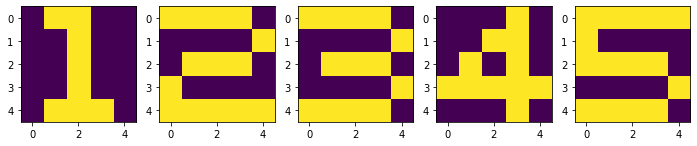

In [32]:
plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X[:,:,n])
plt.show()

### ReLU

In [33]:
def ReLU(x):
    return np.maximum(0, x)

### ReLU를 이용한 정방향 계산

In [34]:
def calcOutput_ReLU(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    v = np.matmul(W4, y3)
    y = Softmax(v)
    
    return y, v1, v2, v3, y1, y2, y3

### 역전파

In [35]:
def backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e
    
    e3 = np.matmul(W4.T, delta)
    delta3 = (v3 > 0) * e3
    
    e2 = np.matmul(W3.T, delta3)
    delta2 = (v2 > 0) * e2
    
    e1 = np.matmul(W2.T, delta2)
    delta1 = (v1 > 0) * e1
    
    return delta, delta1, delta2, delta3

### 가중치 계산

In [36]:
def calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4):
    dW4 = alpha * delta * y3.T
    W4 = W4 + dW4
    
    dW3 = alpha * delta3 * y2.T
    W3 = W3 + dW3
    
    dW2 = alpha * delta2 * y1.T
    W2 = W2 + dW2
    
    dW1 = alpha * delta1 * x.T
    W1 = W1 + dW1
    
    return W1, W2, W3, W4

### 가중치 업데이트

In [37]:
def DeepReLU(W1, W2, W3, W4, X, D, alpha):
    for k in range(5):
        x = np.reshape(X[:,:,k], (25, 1))
        d = D[k,:].T
        
        y, v1, v2, v3, y1, y2, y3 = calcOutput_ReLU(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3,
                               y1, y2, y3, x, W1, W2, W3, W4)
        
    return W1, W2, W3, W4

### 학습

In [38]:
W1 = 2 * np.random.random((20, 25)) - 1
W2 = 2 * np.random.random((20, 20)) - 1
W3 = 2 * np.random.random((20, 20)) - 1
W4 = 2 * np.random.random((5, 20)) - 1

alpha = 0.01
for epoch in tqdm_notebook(range(10000)):
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

C:\Users\seonwook\AppData\Local\Temp/ipykernel_324800/872761195.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(10000)):


  0%|          | 0/10000 [00:00<?, ?it/s]

### 훈련 데이터 검증

In [39]:
def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    
    v = np.matmul(W4, y3)
    y = Softmax(v)
    
    return y

### 결과

In [40]:
N = 5
for k in range(N):
    x = np.reshape(X[:,:,k], (25, 1))
    
    y = verify_algorithm(x, W1, W2, W3, W4)
    
    print('Y = {}'.format(k+1))
    print(np.argmax(y, axis=0) + 1)
    print(y)
    print('------------------------')

Y = 1
[1]
[[9.99986123e-01]
 [3.16122180e-12]
 [1.21911932e-05]
 [1.68293748e-06]
 [2.98024636e-09]]
------------------------
Y = 2
[2]
[[2.02035516e-08]
 [9.99955314e-01]
 [2.85249436e-05]
 [6.70948908e-06]
 [9.43176635e-06]]
------------------------
Y = 3
[3]
[[1.83376258e-05]
 [3.11162524e-05]
 [9.99934301e-01]
 [1.58673548e-06]
 [1.46585198e-05]]
------------------------
Y = 4
[4]
[[4.13612173e-07]
 [1.05564318e-05]
 [2.89616273e-11]
 [9.99989029e-01]
 [1.28532999e-09]]
------------------------
Y = 5
[5]
[[2.30605173e-08]
 [1.38648986e-05]
 [1.38930647e-05]
 [2.75362637e-07]
 [9.99971944e-01]]
------------------------


### 테스트 데이터 생성

In [41]:
X_test = np.zeros((5, 5, 5))

X_test[:, :, 0] = [[0, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 0]]
X_test[:, :, 1] = [[1, 1, 1, 1, 0], [0, 0, 0, 0, 0], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [1, 1, 1, 1, 0]]
X_test[:, :, 2] = [[0, 0, 0, 1, 0], [0, 0, 1, 1, 0], [0, 1, 0, 0, 0], [1, 1, 1, 0, 1], [0, 0, 0, 1, 0]]
X_test[:, :, 3] = [[1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [1, 1, 1, 0, 0]]
X_test[:, :, 4] = [[0, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 1, 1, 0]]

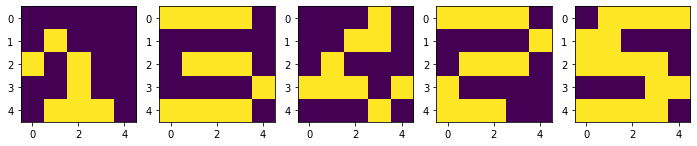

In [42]:
plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X_test[:,:,n])
plt.show()

### 테스트

In [43]:
learning_result = [0, 0, 0, 0, 0]
for k in range(5):
    x = np.reshape(X_test[:,:,k], (25, 1))
    
    y = verify_algorithm(x, W1, W2, W3, W4)
    
    learning_result[k] = np.argmax(y, axis=0) + 1
    
    print('Y = {}'.format(k+1))
    print(np.argmax(y, axis=0) + 1)
    print(y)
    print('------------------------')

Y = 1
[1]
[[0.72167284]
 [0.02123209]
 [0.0659863 ]
 [0.10366991]
 [0.08743886]]
------------------------
Y = 2
[3]
[[1.55690435e-03]
 [9.61534281e-04]
 [8.06349209e-01]
 [4.14955097e-04]
 [1.90717397e-01]]
------------------------
Y = 3
[4]
[[4.65879298e-08]
 [8.42267137e-06]
 [6.38876574e-13]
 [9.99991526e-01]
 [4.86625876e-09]]
------------------------
Y = 4
[5]
[[1.19176588e-07]
 [4.95204955e-02]
 [6.10998262e-05]
 [2.30187496e-04]
 [9.50188098e-01]]
------------------------
Y = 5
[5]
[[1.61499715e-07]
 [9.04298039e-05]
 [1.42817488e-04]
 [3.40929389e-06]
 [9.99763182e-01]]
------------------------


### 그리기

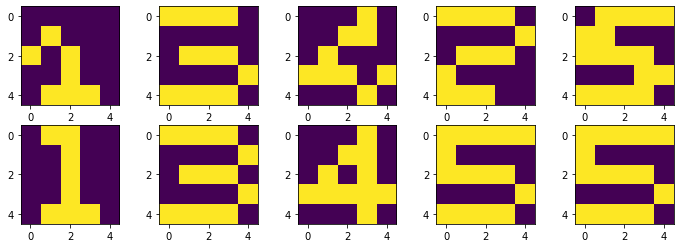

In [44]:
plt.figure(figsize=(12, 4))

for k in range(N):
    plt.subplot(2, 5, k+1)
    plt.imshow(X_test[:,:,k])
    plt.subplot(2, 5, k+6)
    plt.imshow(X[:,:,learning_result[k][0] - 1])

plt.show()

In [47]:
y = np.array([0.1, 0.2, 0.5, 0.8, 0.6, 0.4, 0.3, 1,2, 3, 4])
y.size, y.size*(1-0.8), round(y.size*(1-0.8))

(11, 2.1999999999999993, 2)

In [55]:
num = round(y.size*(1-0.8))
np.random.choice(y.size, num)

array([3, 8])

### dropout 함수 생성

In [56]:
def Dropout(y, ratio):
    ym = np.zeros_like(y)
    
    num = round(y.size*(1-ratio))
    idx = np.random.choice(y.size, num, replace=False)
    ym[idx] = 1.0 / (1.0 - ratio)
    
    return ym

### dropout 적용

In [63]:
def calcOutput_Dropout(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    y1 = y1 * Dropout(y1, 0.2)
    
    v2 = np.matmul(W2, y1)
    y2 = sigmoid(v2)
    y2 = y2 * Dropout(y2, 0.2)
    
    v3 = np.matmul(W3, y2)
    y3 = sigmoid(v3)
    y3 = y3 * Dropout(y3, 0.2)
    
    v = np.matmul(W4, y3)
    y = Softmax(v)
    
    return y, y1, y2, y3, v1, v2, v3
    

### 역전파

In [58]:
def backpropagation_Dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e
    
    e3 = np.matmul(W4.T, delta)
    delta3 = y3 * (1-y3) * e3
    
    e2 = np.matmul(W3.T, delta3)
    delta2 = y2 * (1-y2) * e2
    
    e1 = np.matmul(W2.T, delta2)
    delta1 = y1 * (1-y1) * e1
    
    return delta, delta1, delta2, delta3

### dropout 적용해서 다시 계산

In [66]:
def DeepDropout(W1, W2, W3, W4, X, D, alpha):
    for k in range(5):
        x = np.reshape(X[:,:,k], (25, 1))
        d = D[k,:].T
        
        y, y1, y2, y3, v1, v2, v3 = calcOutput_Dropout(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backpropagation_Dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3,
                               y1, y2, y3, x, W1, W2, W3, W4)
        
    return W1, W2, W3, W4

### 다시 학습

In [67]:
W1 = 2 * np.random.random((20, 25)) - 1
W2 = 2 * np.random.random((20, 20)) - 1
W3 = 2 * np.random.random((20, 20)) - 1
W4 = 2 * np.random.random((5, 20)) - 1

alpha = 0.01
for epoch in tqdm_notebook(range(10000)):
    W1, W2, W3, W4 = DeepDropout(W1, W2, W3, W4, X, D, alpha)

C:\Users\seonwook\AppData\Local\Temp/ipykernel_324800/2635460650.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(10000)):


  0%|          | 0/10000 [00:00<?, ?it/s]

### 결과 출력

In [68]:
for k in range(5):
    x = np.reshape(X_test[:,:,k], (25, 1))
    
    y = verify_algorithm(x, W1, W2, W3, W4)
    
    learning_result[k] = np.argmax(y, axis=0) + 1
    
    print('Y = {}'.format(k+1))
    print(np.argmax(y, axis=0) + 1)
    print(y)
    print('------------------------')

Y = 1
[3]
[[1.83568187e-06]
 [4.71886599e-12]
 [6.45774586e-01]
 [2.24870476e-16]
 [3.54223578e-01]]
------------------------
Y = 2
[3]
[[1.02803514e-16]
 [8.17184311e-09]
 [9.99999228e-01]
 [2.14695544e-24]
 [7.64214467e-07]]
------------------------
Y = 3
[4]
[[7.06434119e-14]
 [4.41057992e-13]
 [1.94706918e-20]
 [1.00000000e+00]
 [1.08213331e-24]]
------------------------
Y = 4
[3]
[[9.47891342e-13]
 [9.10709632e-05]
 [9.99726395e-01]
 [5.90374261e-15]
 [1.82533898e-04]]
------------------------
Y = 5
[5]
[[2.62179841e-09]
 [3.78391528e-14]
 [3.08921079e-01]
 [3.24155499e-18]
 [6.91078919e-01]]
------------------------


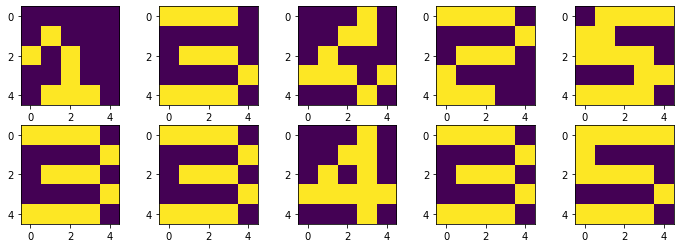

In [69]:
plt.figure(figsize=(12, 4))

for k in range(N):
    plt.subplot(2, 5, k+1)
    plt.imshow(X_test[:,:,k])
    plt.subplot(2, 5, k+6)
    plt.imshow(X[:,:,learning_result[k][0] - 1])

plt.show()